In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
# Load data
data = pd.read_csv("rainfall.csv")


# Display data head
print("Data heads:")
print(data.head())

Data heads:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    

In [22]:
# Check for null values
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())

Null values in the dataset before preprocessing:
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64


In [23]:
# Fill null values with mean of numerical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify null values are filled
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())


Null values in the dataset after preprocessing:
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


In [24]:
# Verify null values are filled
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())

Null values in the dataset after preprocessing:
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


In [25]:
# Display data shape and info
print("\n\nShape: ", data.shape)
print("Info:")
print(data.info())



Shape:  (4116, 19)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non

In [26]:
# Group by 'SUBDIVISION'
print("Group by:")
print(data.groupby('SUBDIVISION').size())

Group by:
SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA      

Scatter plot of annual and January attributes


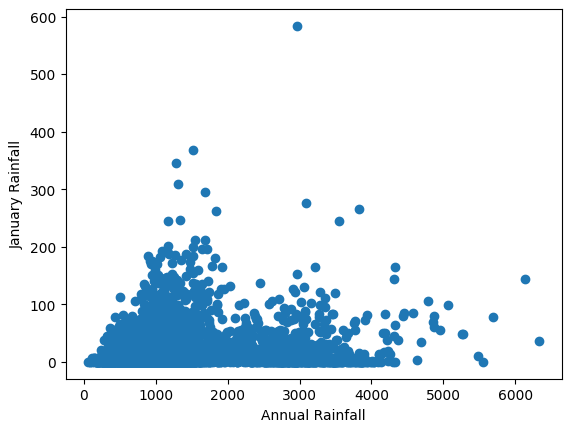

In [27]:
# Scatter plot of annual and January attributes
print("Scatter plot of annual and January attributes")
plt.scatter(data['ANNUAL'], data['JAN'])
plt.xlabel('Annual Rainfall')
plt.ylabel('January Rainfall')
plt.show()

Box Plot of annual rainfall data in years 1901-2015


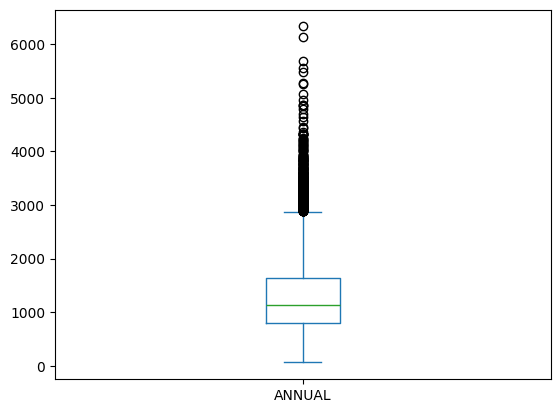

In [28]:
# Box Plot of annual rainfall data
print("Box Plot of annual rainfall data in years 1901-2015")
data['ANNUAL'].plot(kind='box', sharex=False, sharey=False)
plt.show()

Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


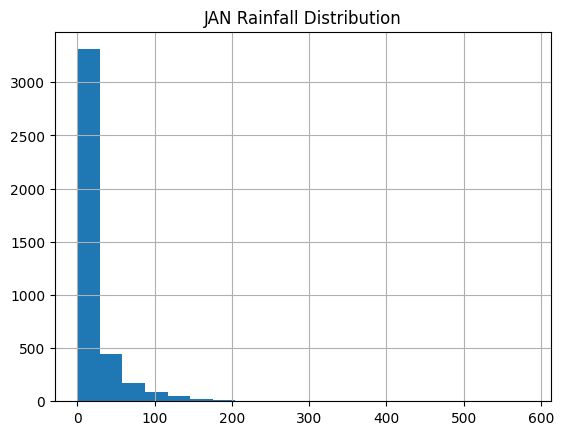

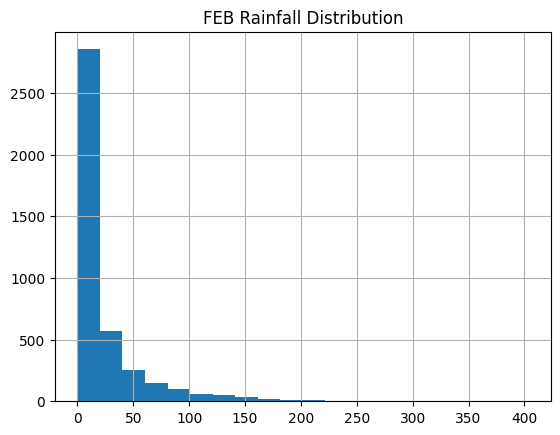

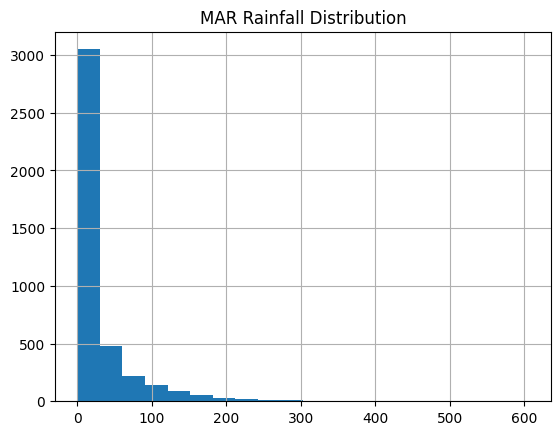

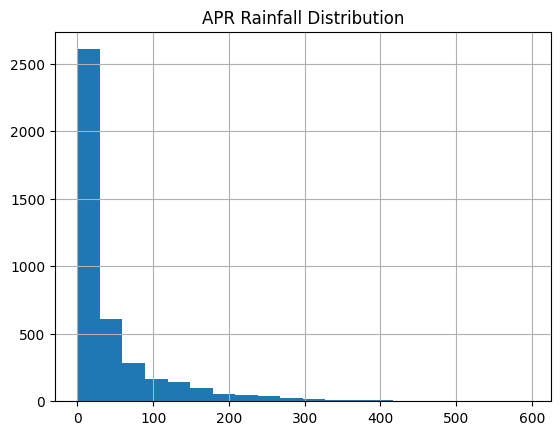

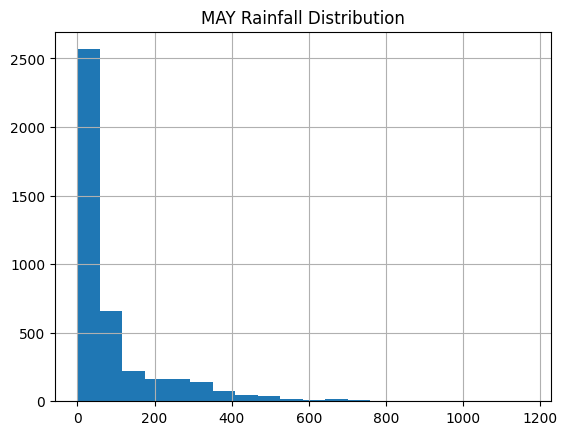

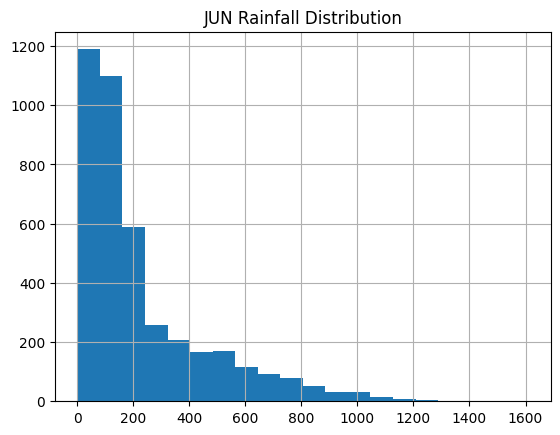

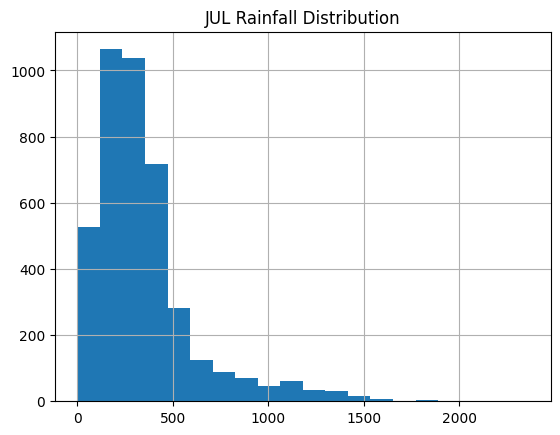

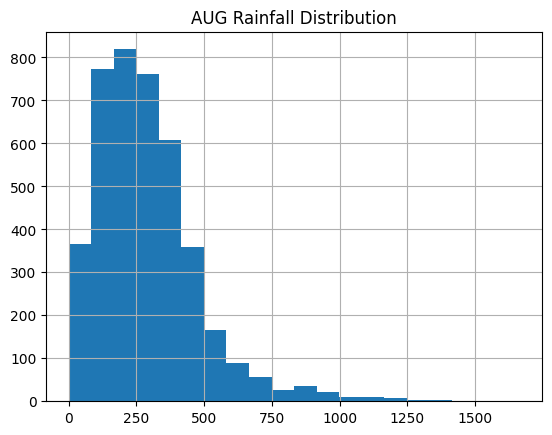

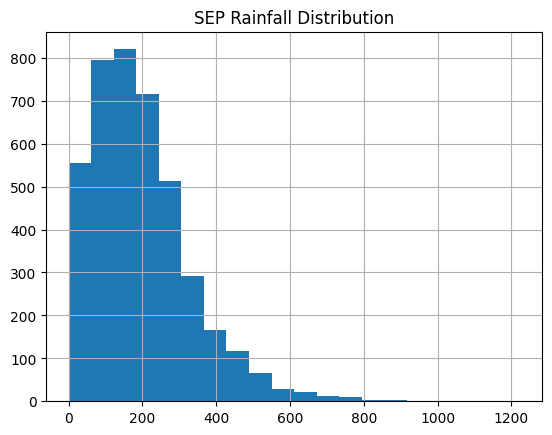

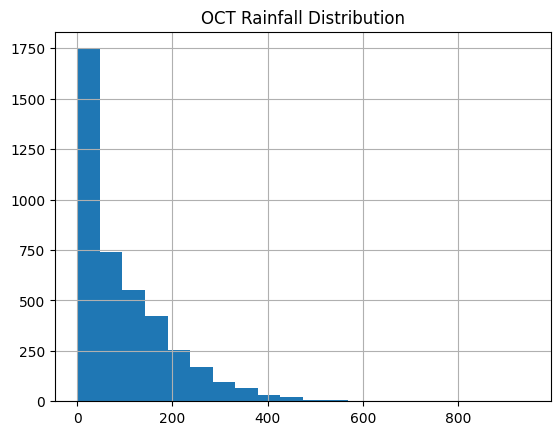

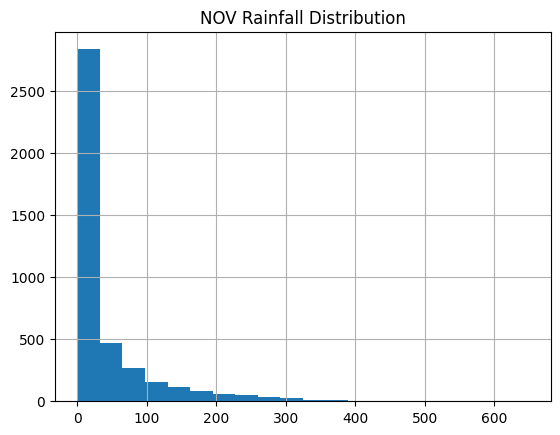

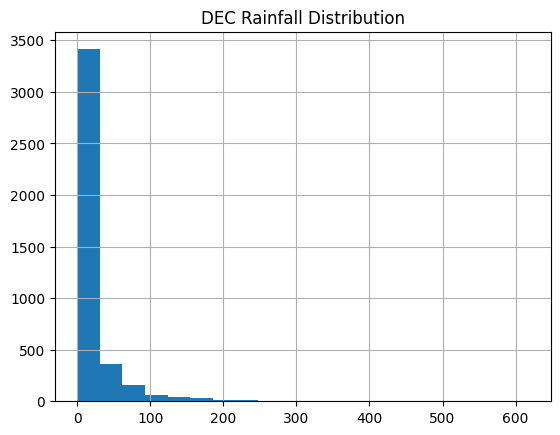

In [29]:
# Histograms showing the data from attributes (JANUARY to DECEMBER)
print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:")
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
for month in months:
    data[month].hist(bins=20)
    plt.title(f"{month} Rainfall Distribution")
    plt.show()

Histogram showing the annual rainfall of the all states:


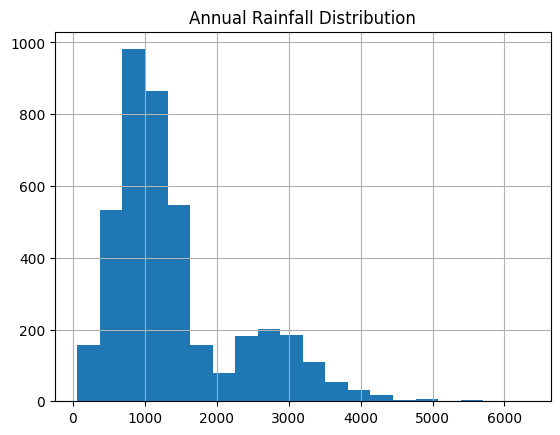

In [30]:
# Histogram showing the annual rainfall of all states
print("Histogram showing the annual rainfall of the all states:")
data['ANNUAL'].hist(bins=20)
plt.title('Annual Rainfall Distribution')
plt.show()


Violin plot of the ANNUAL attribute :-


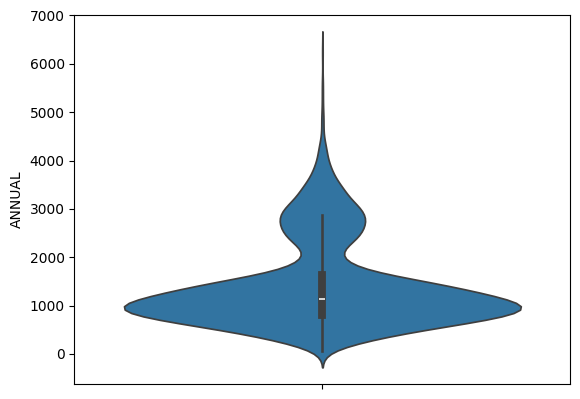

In [31]:
# Violin plot of the ANNUAL attribute
print("Violin plot of the ANNUAL attribute :-")
sb.violinplot(data=data['ANNUAL'])
plt.show()

In [32]:
X = data[months]
y = data['ANNUAL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Initialize and train the DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions with both models
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Evaluate the RandomForestRegressor
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")
print(f"Mean Absolute Error: {rf_mae}")

# Evaluate the DecisionTreeRegressor
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
print("Decision Tree Regressor:")
print(f"Mean Squared Error: {dt_mse}")
print(f"R-squared: {dt_r2}")
print(f"Mean Absolute Error: {dt_mae}")

Random Forest Regressor:
Mean Squared Error: 29029.524792008247
R-squared: 0.9668242662650233
Mean Absolute Error: 91.11724410829156
Decision Tree Regressor:
Mean Squared Error: 83692.79245939644
R-squared: 0.9043535911089393
Mean Absolute Error: 177.66324150782162


In [33]:
#custom accuracy
def accuracy_within_threshold(y_true, y_pred, threshold=0.1):
    accuracy = np.mean(np.abs((y_true - y_pred) / y_true) <= threshold)
    return accuracy

# Calculate the custom accuracy
rf_accuracy = accuracy_within_threshold(y_test, rf_pred)
dt_accuracy = accuracy_within_threshold(y_test, dt_pred)
print(f"Random Forest Accuracy within 10% threshold: {rf_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy within 10% threshold: {dt_accuracy * 100:.2f}%")

Random Forest Accuracy within 10% threshold: 78.52%
Decision Tree Accuracy within 10% threshold: 51.21%


In [34]:
if rf_r2 > dt_r2:
    best_model = rf_model
    print("Random Forest is the better model based on R-squared.")
else:
    best_model = dt_model
    print("Decision Tree is the better model based on R-squared.")

Random Forest is the better model based on R-squared.


In [35]:
# Save the best model using pickle
import pickle
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

# Load the model using pickle
with open("best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Verify the loaded model by making predictions
loaded_model_pred = loaded_model.predict(X_test)
print(f"Loaded model Mean Squared Error: {mean_squared_error(y_test, loaded_model_pred)}")

Loaded model Mean Squared Error: 29029.524792008247


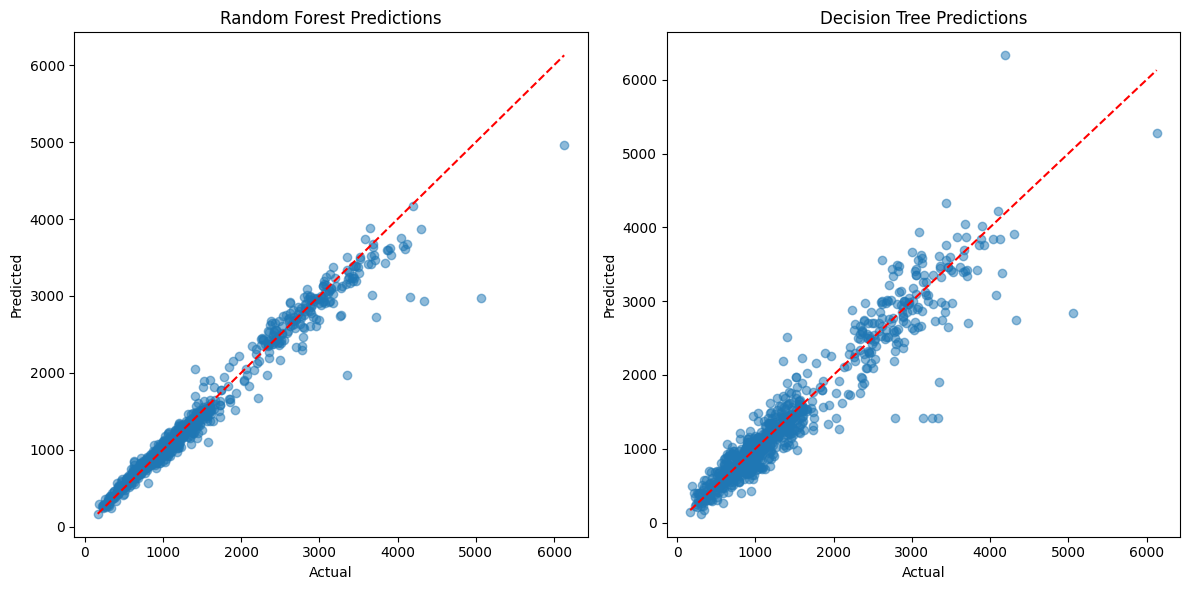

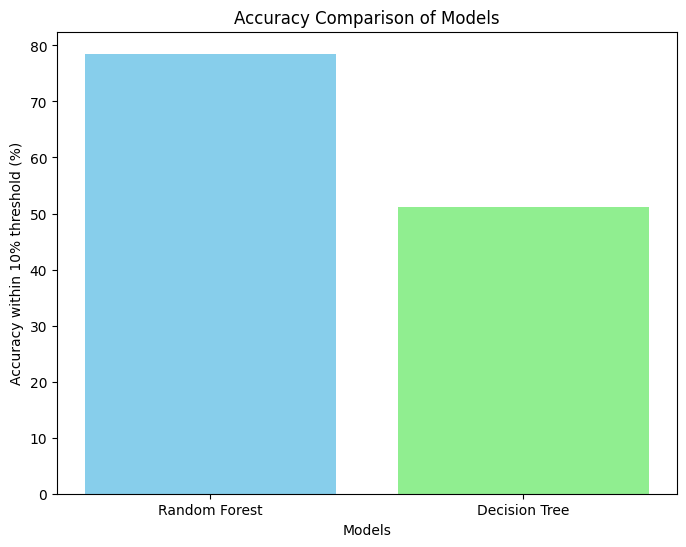

In [36]:
# Visualization of prediction errors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Predictions')

plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Predictions')

plt.tight_layout()
plt.show()

# Bar graph for accuracy comparison
models = ['Random Forest', 'Decision Tree']
accuracies = [rf_accuracy * 100, dt_accuracy * 100]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy within 10% threshold (%)')
plt.title('Accuracy Comparison of Models')
plt.show()